# KEGG to BEL Statistics

### This notebook generates the statisitics for all entity and interaction types available in KGML files and those captured in their transformation into BEL nodes and edges, respectively.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from pathme.kegg import utils
from pathme.constants import KEGG_FILES, KEGG_STATS_COLUMN_NAMES, KEGG_MODIFICATIONS, KEGG_CACHE
from pathme.kegg.utils import get_kegg_pathway_ids, get_kegg_statistics
from pathme.utils import get_files_in_folder


from pybel_tools import summary
from pybel_jupyter import to_jupyter

from bio2bel_chebi import Manager as ChebiManager
from bio2bel_hgnc import Manager as HgncManager

In [2]:
kegg_download_folder = KEGG_FILES

# Initiate HGNC Manager
hgnc_manager = HgncManager()

# Initiate ChEBI Manager
chebi_manager = ChebiManager()

### Generate a KEGG pathway statistics dataframe with the default *un-flattened* condition enabled.  This condition generates protein and chemical abundance composites in BEL graphs.

In [3]:
kegg_pathways_statistics = get_kegg_statistics(kegg_download_folder, hgnc_manager, chebi_manager, flatten=False)

Parsing KGML files and BEL graphs for entities and relation stats: 100%|██████████| 330/330 [01:59<00:00,  2.76it/s]


In [4]:
# Non-flat KEGG pathway statistics dataframe
kegg_pathways_statistics

,BEL Nodes,XML Entities,BEL Edges,XML Interactions,BEL Proteins,XML Genes,BEL Composites,BEL RNA Entities,BEL Complexes,XML Complexes,...,BEL Component Edges,BEL Variant Edges,BEL Reactants Edges,BEL Products Edges,XML Compound Relations,XML Dissociation Relations,XML Hidden Compound Relations,XML Missing Interaction Relations,XML State Change Relations,XML Brite Hierarchy
Arrhythmogenic right ventricular cardiomyopathy (ARVC),86,116,58,12,72,106,7,0,0,0,...,51,0,0,0,0,0,0,4,0,0
Vibrio cholerae infection,73,87,81,42,52,50,7,0,0,0,...,40,2,0,0,8,0,0,0,0,0
Hepatocellular carcinoma,242,249,224,87,170,214,34,4,9,9,...,159,2,0,0,0,1,0,10,0,0
Rap1 signaling pathway,257,242,267,91,206,216,32,0,5,5,...,176,0,0,0,0,0,0,0,0,0
Th17 cell differentiation,170,178,199,103,109,149,23,11,11,11,...,96,2,0,0,0,0,0,0,0,0
Apoptosis - multiple species,43,60,19,0,33,46,7,0,0,0,...,19,0,0,0,0,0,0,0,0,0
Mitophagy - animal,91,70,113,72,75,67,10,3,1,1,...,31,10,0,0,0,0,0,0,0,0
p53 signaling pathway,123,86,100,73,75,78,9,32,3,3,...,27,3,0,0,0,0,0,0,0,0
cGMP-PKG signaling pathway,231,197,247,98,172,168,34,3,1,1,...,141,9,0,0,0,0,0,0,0,0
Osteoclast differentiation,182,145,222,120,137,133,26,7,3,3,...,93,10,0,0,2,1,0,0,0,0


### Plot statistics for all entities and interactions in KEGG pathways when default *non-flattened* condition is enabled.

Text(0, 0.5, 'Frequency')

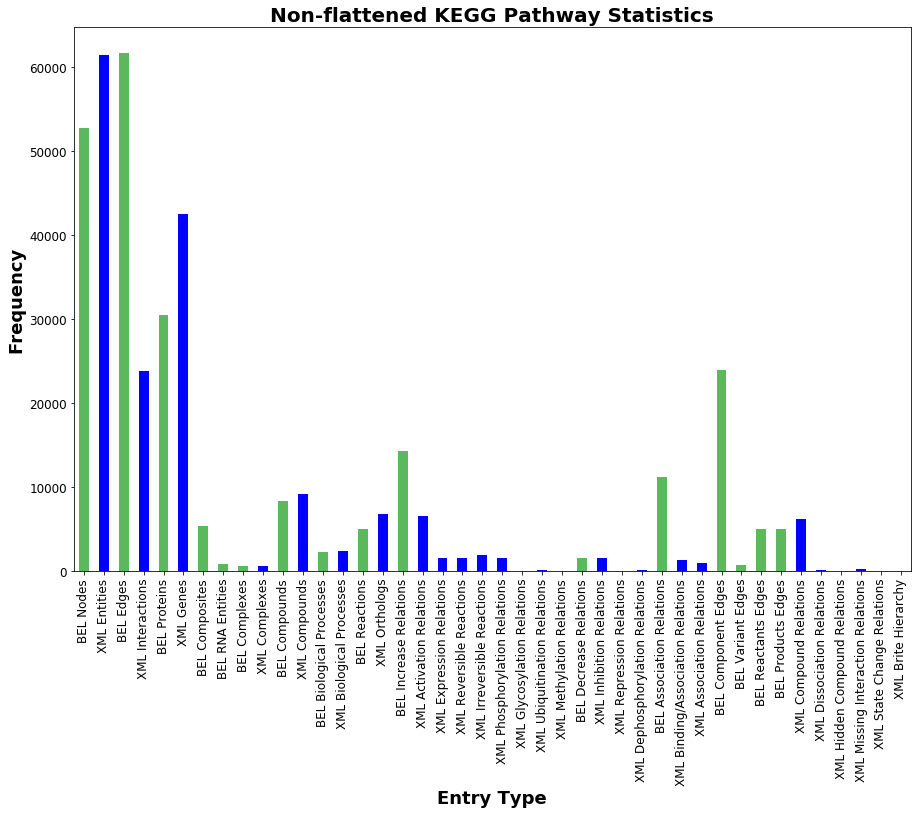

In [7]:
color_dict = {}

unflattened_statistics = kegg_pathways_statistics.sum(axis=0)

for index, value in unflattened_statistics.iteritems():
    if index.startswith('BEL'):
        color_dict[index] = '#5cb85c'
    else:
        color_dict[index] = 'b'

non_flat = unflattened_statistics.plot(kind='bar', figsize=(15,10), fontsize=12, color=[color_dict.get(x) for x,y in unflattened_statistics.iteritems()])
non_flat.title.set_size(20)
non_flat.set_title('Non-flattened KEGG Pathway Statistics', fontdict={'weight' : 'bold', 'size': 20})
non_flat.set_xlabel('Entry Type', fontdict={'weight' : 'bold', 'size': 18})
non_flat.set_ylabel('Frequency', fontdict={'weight' : 'bold', 'size': 18})

### Generate a KEGG pathway statistics dataframe when the *flattened* condition is enabled.

In [9]:
kegg_pathways_statistics_flattened = get_kegg_statistics(
    kegg_download_folder, 
    hgnc_manager, 
    chebi_manager, 
    flatten=True)

Parsing KGML files and BEL graphs for entities and relation stats: 100%|██████████| 330/330 [00:45<00:00,  7.20it/s]


In [10]:
# Flat KEGG pathway statistics dataframe
kegg_pathways_statistics_flattened

,BEL Nodes,XML Entities,BEL Edges,XML Interactions,BEL Proteins,XML Genes,BEL Composites,BEL RNA Entities,BEL Complexes,XML Complexes,...,BEL Component Edges,BEL Variant Edges,BEL Reactants Edges,BEL Products Edges,XML Compound Relations,XML Dissociation Relations,XML Hidden Compound Relations,XML Missing Interaction Relations,XML State Change Relations,XML Brite Hierarchy
Arrhythmogenic right ventricular cardiomyopathy (ARVC),79,116,13,12,72,106,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
Vibrio cholerae infection,75,87,139,42,61,50,0,0,0,0,...,0,11,0,0,8,0,0,0,0,0
Hepatocellular carcinoma,234,249,294,87,174,214,0,26,9,9,...,59,6,0,0,0,1,0,10,0,0
Rap1 signaling pathway,227,242,1236,91,208,216,0,0,5,5,...,15,2,0,0,0,0,0,0,0,0
Th17 cell differentiation,155,178,295,103,115,149,0,13,11,11,...,42,8,0,0,0,0,0,0,0,0
Apoptosis - multiple species,36,60,0,0,33,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mitophagy - animal,87,70,149,72,81,67,0,3,1,1,...,3,16,0,0,0,0,0,0,0,0
p53 signaling pathway,126,86,93,73,75,78,0,44,3,3,...,11,3,0,0,0,0,0,0,0,0
cGMP-PKG signaling pathway,235,197,601,98,210,168,0,3,1,1,...,2,47,0,0,0,0,0,0,0,0
Osteoclast differentiation,182,145,489,120,163,133,0,7,3,3,...,26,36,0,0,2,1,0,0,0,0


### Plot statistics for all entities and interactions in KEGG pathways when *flattened* condition is enabled.

Text(0, 0.5, 'Frequency')

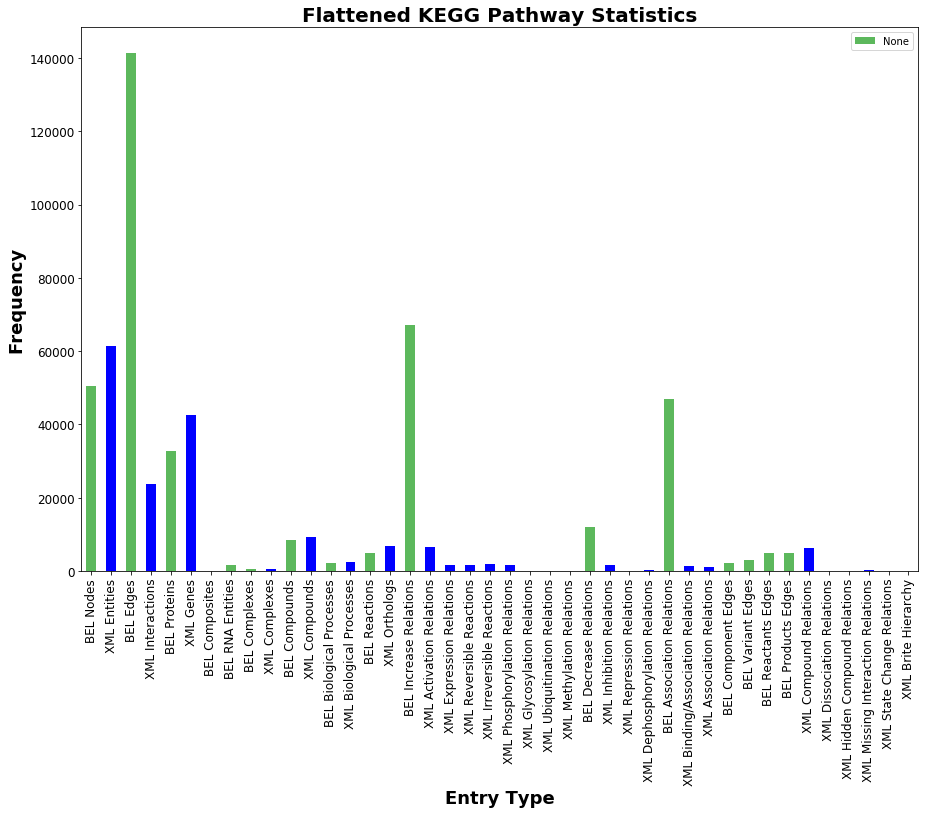

In [11]:
flattened_statistics = kegg_pathways_statistics_flattened.sum(axis=0)

flat = flattened_statistics.plot(kind='bar', title='Flattened KEGG Pathway Statistics', figsize=(15,10), legend=True, fontsize=12,
    color=[color_dict.get(x) for x,y in flattened_statistics.iteritems()])

flat.title.set_size(20)
flat.set_title('Flattened KEGG Pathway Statistics', fontdict={'weight' : 'bold', 'size': 20})
flat.set_xlabel('Entry Type', fontdict={'weight' : 'bold', 'size': 18})
flat.set_ylabel('Frequency', fontdict={'weight' : 'bold', 'size': 18})

### Entity and interaction BEL graph statistics depending on flattened or non-flattened conditions

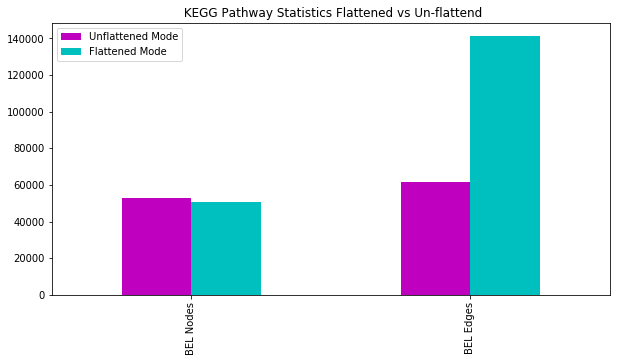

In [16]:
non_flat_stats = unflattened_statistics[['BEL Nodes','BEL Edges']]
flat_stats = flattened_statistics[['BEL Nodes', 'BEL Edges']]
df = pd.DataFrame({'Unflattened Mode': non_flat_stats, 'Flattened Mode': flat_stats})
df.plot.bar(title=' KEGG Pathway Statistics Flattened vs Un-flattend', figsize=(10,5), legend=True, color=['m','c'])

#### The difference in the number of BEL *nodes* in the un-flattened versus flattened mode, where the value of the former is slightly larger, can be attributed to the inclusion of composites in the unflattened condition.

#### The difference in the number of BEL *edges* in the un-flattened versus flattened mode, where the value of the latter is significantly higher than that of the former, is due to the generation of edges between all composite *components* to each of the composites' neighbours. In contrast, in un-flattened mode, edges are restricted to those between composites and their neighbours.

### Number of entities and interactions present in all KEGG XML files

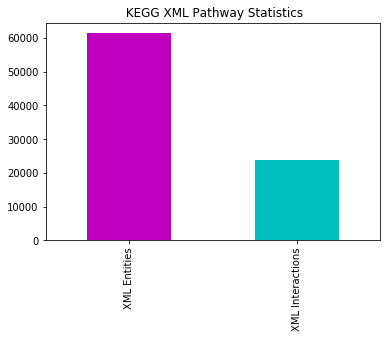

In [18]:
non_flat_stats = unflattened_statistics[['XML Entities', 'XML Interactions']]
non_flat_stats.plot.bar(title=' KEGG XML Pathway Statistics', color=['m','c'])

### BEL vs XML node statistics

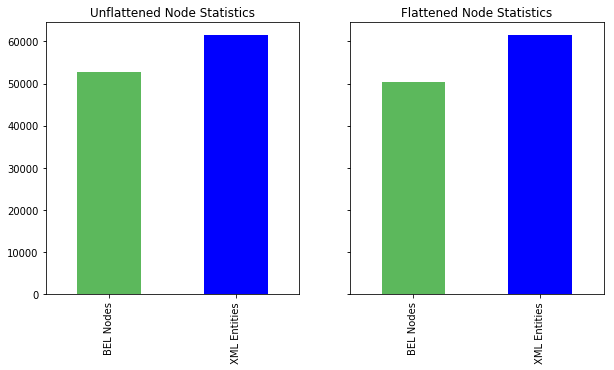

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)

node_stats = unflattened_statistics[['BEL Nodes', 'XML Entities']]
node_stats.plot.bar(ax=ax1,title='Unflattened Node Statistics', figsize=(10,5), color=[color_dict.get(x) for x,y in unflattened_statistics.iteritems()])

flat_node_stats = flattened_statistics[['BEL Nodes', 'XML Entities']]
flat_node_stats.plot.bar(ax=ax2,title = 'Flattened Node Statistics', figsize=(10,5), color=[color_dict.get(x) for x,y in flattened_statistics.iteritems()])

#### The number of BEL nodes is notably less than the number of entities in the XML file. Though a minority of those entities that were not translated from XML into BEL include orthologs, the majority of ostensible 'information loss' is in genes and compounds. While entries in KGML files can be repeated, with the possibility of multiple, identical entries with unique IDs, all nodes are unique in BEL graph representations. Thus, this discrepancy in the number of entities can be largely attributed to the removal of duplicates. 

#### The difference between BEL nodes in the flattened and un-flattened conditions is because of the inclusion of composites in the un-flattened condition.


### BEL vs XML edge statistics

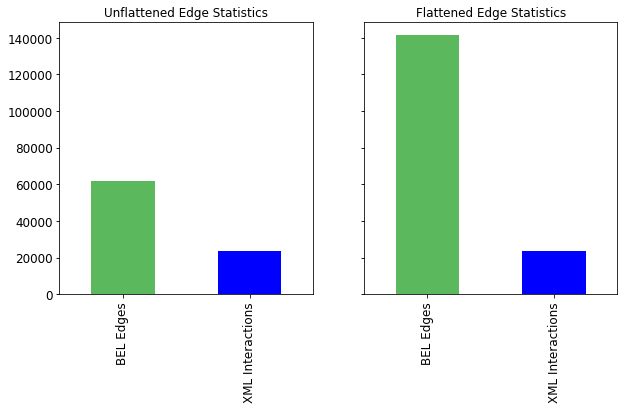

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)

edge_stats = unflattened_statistics[['BEL Edges', 'XML Interactions']]
edge_stats.plot.bar(ax=ax1,title = 'Unflattened Edge Statistics', figsize=(10,5), fontsize=12, color=[color_dict.get(x) for x,y in unflattened_statistics.iteritems()])

flat_edge_stats = flattened_statistics[['BEL Edges', 'XML Interactions']]
flat_edge_stats.plot.bar(ax=ax2,title='Flattened Edge Statistics', figsize=(10,5),fontsize=12, color=[color_dict.get(x) for x,y in flattened_statistics.iteritems()])

#### The discrepancy between the number of edges in the BEL graph in the un-flattened condition is larger than the number of edges in the XML file as additional edges are generated between complex components and reaction elements. 

#### The number of edges in the flattened condition is significantly higher than in the un-flattened due to the inclusion of additional edges between composite components and their neighbours and the aforementioned addition of edges between reaction elements and complex members. 